---
title: python模拟数据的生成
date: 2018-12-09 18:17:55
tags: [python]
toc: true

---

这篇文章的目的是使用python生成一些具有某些统计特征的随机变量。
<span></span>
<!-- more -->

生成模拟数据是一个非常有用的功能, 因为我们有时候很难拿到真实世界的数据, 所以需要一些人工生成的数据以便完成我们的实验或证明一些理论。下面我们介绍一些我经常用到的一些生成数据的方法, 有类似需求你们可以找到我。

### 生成特定分布的连续数据

#### 正态分布

连续数据就是数据是连续的, 比如0-1的小数, 而离散数据一般是指分类数据或者分等级数据, 我们先从最简单的做起, 生成连续的数据, 并确保它是正态分布。

先引入用到的库:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

生成均值为0, 标准差为1的正太分布数据, 样本量为100, 然后将数据可视化:

In [28]:
x = np.random.normal(0, 1, 10000)

使用直方图绘制所有的样本:

<a list of 1 Patch objects>

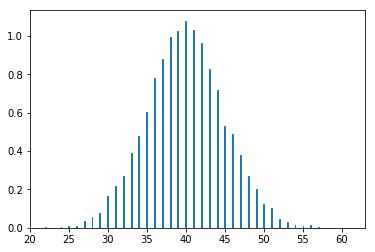

In [34]:
plt.hist(x, bins=500, histtype='step', normed=True)[-1]

#### 二项分布

二项分布（伯努利分布）是n个独立的是/非试验中成功的次数的概率分布，其中每次试验的成功概率为p。这是一个离散分布。

比如, 我们实验100次, 每次试验成功的概率是0.4, 求成功次数的概率分布。

<a list of 1 Patch objects>

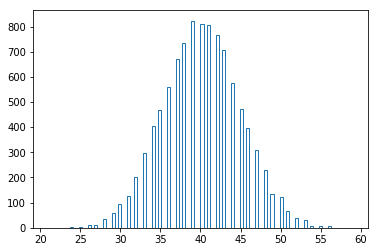

In [36]:
x = np.random.binomial(100, 0.4, size=10000)

plt.hist(x, bins=100, histtype='step')[-1]

#### 其他分布

当然你还可以按照上面的方法生成所有常用的分布的数据, 但是我们不在这里一一举例了, 我们还有更重要的事情要做。

### 生成独立的双变量数据

这个例子很简单, 但是很有必要, 我们其实只需要分别生成两个变量即可:

In [37]:
x1 = np.random.normal(0, 1, 1000)
x2 = np.random.normal(0, 1, 1000)

我们可以计算一下两个变量的相关, 你可以看到他俩相关几乎为0:

In [39]:
np.corrcoef(x1, x2)

array([[ 1.        , -0.00209488],
       [-0.00209488,  1.        ]])

### 生成相关为0.5的双变量数据

现在有些难度, 我们怎么控制变量之间的相关呢? 其实在numpy中有一个函数叫做`multivariate_normal`, 就是多元正太分布, 用于生成多元正太分布数据, 并且可以指定随机变量的协方差矩阵, 我们都知道, 协方差和相关系数之间的关系是:

$$
Corr(X, Y) = {Cov(X, Y) \over {(Var(X)Var(Y))^{0.5}}}
$$

所以控制好了方差和协方差, 就是控制好了相关系数, 所以我们假设两个变量之间的相关系数是0.5, 两个变量都符合N(0, 1)分布, 所以两个变量之间的协方差就是0.5, 如此就可以这样生成数据:

In [43]:
# 均值为0, 标准差为1的多元正太分布
X = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 1]], 1000)

如果两个变量是相关的, 你看到的三点图就应该是一个椭圆形:

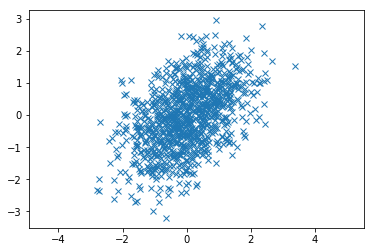

In [50]:
plt.plot(X[:, 0], X[:, 1], 'x')
plt.axis('equal')
plt.show()


再去计算一下相关系数(应该比较接近我们设置的0.5的相关):

In [52]:
np.corrcoef(X[:, 0], X[:, 1])

array([[1.        , 0.47665845],
       [0.47665845, 1.        ]])

当然, 我们看一下相关更大的一些数据, 比如相关为0.9:

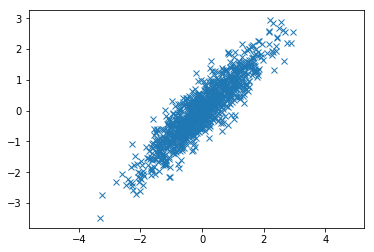

In [54]:
X = np.random.multivariate_normal([0, 0], [[1, 0.9], [0.9, 1]], 1000)
plt.plot(X[:, 0], X[:, 1], 'x')
plt.axis('equal')
plt.show()

### 挑战: 按照因子载荷生成数据

说实话再写这篇文章之前我完全不知道怎么完成这个挑战。所以我回去复习了因子分析的算法。根据上面的例子, 我们知道生成一组多元正态变量的关键在于设定这组变量的均值和协方差矩阵, 所以我们需要知道因子载荷和协方差矩阵的关系(因子载荷和均值没有关系, 因为我们预先假设所有变量均值为0)。

我不想说一些你们听不懂的东西, 但是有时候觉得这样就无话可说, 水平有限。我们知道, n个变量可以提取m个因子, 而m个因子的线性组合就可以得到n个变量, 假设$L$代表因子载荷矩阵, 所以我们有如下公式:

$$
X - \mu = LF + \epsilon
$$

$F$就是因子矩阵, 通常我们称为m个潜变量, 潜变量之间是正交的, 也就是相关为0, $\mu$ 是X的均值, 所以可以假设为0, 假设$X = [X_1, X_2, X_3]$, 则$\mu = [0, 0, 0]$, $epsilon$是特殊因子向量, 也就是不能被公共因子F所解释的, 并且与$\epsilon$与所有公共因子正交。

我们假设公共因子F满足多元正态分布, 包含3个潜变量,  且各个潜变量间相互正交, 并且潜变量和$\epsilon$的均值为0, 他们的方差均为1, 那么我们可以同时生成F和$\epsilon$:

In [4]:
Fepsilon = np.random.multivariate_normal(
    [0, 0, 0, 0], 
    [[1, 0, 0, 0],
     [0, 1, 0, 0], 
     [0, 0, 1, 0], 
     [ 0, 0, 0, 1], ],
    1000
)

F = Fepsilon[:, :3]
epsilon = Fepsilon[:, -1]
print(F.shape)

(1000, 3)


我们定义一个因子载荷矩阵, 里面的数值是已知的, 因为我们就要按照这个因子载荷生成数据:

我们有如下已知条件:

$$
X_1 = 0.8*F_1 + 0.1*F_2 + 0.1*F_3 
X_2 = 0.2*F_1 + 0.7*F_2 + 0.1*F_3 
X_3 = 0.2*F_1 + 0.3*F_2 + 0.5*F_3 
$$

In [17]:
 ### 根据已知条件可以得到这个载荷矩阵:

L = np.array(
[
    [0.8, 0.2, 0.2],
    [0.1, 0.7, 0.3],
    [0.1, 0.1, 0.5]
])
L

array([[0.8, 0.2, 0.2],
       [0.1, 0.7, 0.3],
       [0.1, 0.1, 0.5]])

所以我们可以得到矩阵X(假设$mu$是0):

In [18]:
X = np.dot( F, L) + epsilon.reshape(1000, 1)
print(X.shape)

(1000, 3)


我们虽然得到了X, 但是我们怎么验证结果对不对呢? 目前暂时没有好的方法, 现在只是通过反向求得因子载荷矩阵, 看看和初始的载荷矩阵有什么差别:

### 因子分析

做因子分析的解释会比较少, 因为我们这篇文章的目的并不是这个。

先求相关矩阵:

In [19]:
R = np.corrcoef(X.T)
R

array([[1.        , 0.75914447, 0.81103438],
       [0.75914447, 1.        , 0.88279048],
       [0.81103438, 0.88279048, 1.        ]])

求特征值和特征向量:

In [20]:
import numpy.linalg as nlg

eig_value, eig_vector = nlg.eig(R)
eig_value

array([2.63636942, 0.25335172, 0.11027886])

最后, 我们求因子载荷矩阵:

$$
A = (...,\lambda_i^{0.5} l_i, ...)
$$

In [21]:
A = np.zeros((3, 3))
A[:, 0] = eig_value[0]**0.5*eig_vector[:, 0]
A[:, 1] = eig_value[1]**0.5*eig_vector[:, 1]
A[:, 2] = eig_value[2]**0.5*eig_vector[:, 2]
A

array([[ 0.91181616,  0.40600843, -0.06122448],
       [ 0.9405524 , -0.27299534, -0.20207603],
       [ 0.95933408, -0.11824727,  0.25631172]])

这个因子载荷矩阵我不太满意, 因为与我们初始设置的载荷矩阵相差很多, 这是因为因子的角度是不同的, 所以我试了试最大方差因子旋转, 结果是:
```
[.874	.351	.337
.379	.834	.401
.440	.500	.746]
```

虽然还是相差很多, 但是已经比上面的好很多。

这篇教程就先到此为止, 以后有更好的方法, 我会在这篇文章中更新! 也欢迎你更好的idea!